### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
batch1 = pickle.load(open(r'.\Data\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

batch1['summary']['cycle']

In [9]:
batch1.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])

In [10]:
bat_dict = {**batch1}

In [11]:
type(bat_dict)

dict

(0.0, 1000.0)

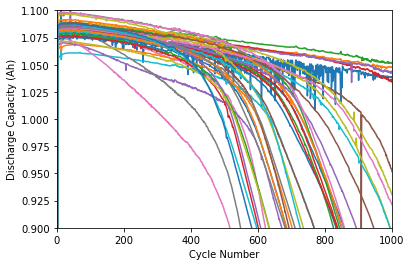

In [12]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.ylim(0.90,1.10)
plt.xlim(0,1000)

### Train and Test Split

In [13]:
bat_dict['b1c25']['summary']['cycle']

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [14]:
bat_dict['b1c25']['summary']['QD']

array([0.        , 1.0752345 , 1.0763277 , 1.0766819 , 1.0772517 ,
       1.0775747 , 1.0777456 , 1.0779704 , 1.0781482 , 1.0783457 ,
       1.078598  , 1.0787464 , 1.0788994 , 1.0789477 , 1.0789433 ,
       1.0789938 , 1.0790927 , 1.0791383 , 1.0791379 , 1.0792229 ,
       1.0792434 , 1.079232  , 1.0792979 , 1.0792787 , 1.0780314 ,
       1.0792596 , 1.0792792 , 1.0792816 , 1.0793499 , 1.0793725 ,
       1.0793666 , 1.0794182 , 1.079448  , 1.0794551 , 1.0794472 ,
       1.0794848 , 1.0795194 , 1.0795679 , 1.0795426 , 1.0795244 ,
       1.0795215 , 1.0794741 , 1.0794564 , 1.07941   , 1.0793877 ,
       1.079385  , 1.0793488 , 1.0793023 , 1.0793445 , 1.0793265 ,
       1.0794868 , 1.079664  , 1.0798512 , 1.0799131 , 1.0798471 ,
       1.0793748 , 1.0792863 , 1.0792454 , 1.0792495 , 1.079209  ,
       1.0791895 , 1.0792062 , 1.0791804 , 1.0791718 , 1.0790961 ,
       1.0790548 , 1.0790472 , 1.0790274 , 1.0789471 , 1.078935  ,
       1.0788885 , 1.0788687 , 1.0787885 , 1.0788136 , 1.07875

In [85]:
bat_dict['b1c25']['summary'] 

{'IR': array([0.        , 0.01669928, 0.01666305, 0.01664449, 0.0166071 ,
        0.0166115 , 0.01659714, 0.01657428, 0.01656834, 0.01655566,
        0.01653962, 0.0165314 , 0.01652444, 0.01651525, 0.01653447,
        0.01654139, 0.01653242, 0.01654633, 0.01654435, 0.01654618,
        0.0165446 , 0.01655343, 0.01654427, 0.0165486 , 0.01655896,
        0.01657411, 0.01657375, 0.01657911, 0.01656399, 0.01655651,
        0.01656696, 0.01654749, 0.01656614, 0.01655255, 0.01656079,
        0.0165425 , 0.01653541, 0.01654679, 0.01653507, 0.01653804,
        0.01654027, 0.01655678, 0.01656615, 0.01656925, 0.01657751,
        0.01655632, 0.01657108, 0.01657578, 0.01656874, 0.01658818,
        0.01656249, 0.0164867 , 0.01642651, 0.01639786, 0.01639963,
        0.01652799, 0.01659225, 0.01661458, 0.01661211, 0.01661378,
        0.01660918, 0.01660597, 0.01659598, 0.01660023, 0.01661041,
        0.01660397, 0.01662328, 0.01660486, 0.01661761, 0.0166175 ,
        0.01662208, 0.01660657, 0.01663579

In [16]:
bat_dict['b1c25']['cycle_life']

array([[854.]])

In [17]:
bat_dict['b1c25']['charge_policy']

'6C(40%)-3C'

In [ ]:
bat_dict['b1c25']['cycles']

In [19]:
bat_dict['b1c25']['cycles'].keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [20]:
bat_dict['b1c25'].keys()

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

In [21]:
bat_dict['b1c25']['summary'].keys()

dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])

In [22]:
voltage = []
voltageVar = []
CycleLife = []
for i in bat_dict.keys():
    CycleLife.append(np.mean(bat_dict[i]['cycle_life']))
    for j in bat_dict[i]['cycles'].keys():
        if int(j) > 9 or int(j) < 101 :
            voltage.append(np.mean(bat_dict[i]['cycles'][j]['V']))
    voltageVar.append(np.var(voltage))
    voltage =[]

In [23]:
len(CycleLife)

41

In [24]:
correlcoefficient = np.corrcoef(CycleLife,voltageVar)

In [25]:
correlcoefficient

array([[ 1.       , -0.6921668],
       [-0.6921668,  1.       ]])

In [26]:
rho = correlcoefficient[0][1]

### Figure-2c reproduced for the cells in the given batch data

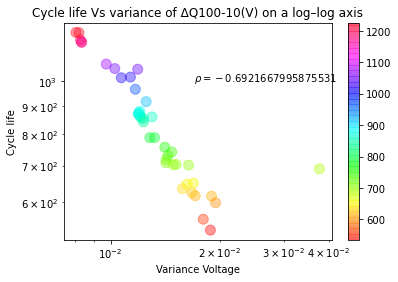

In [82]:
fig = plt.figure()
ax = plt.gca()
sc = ax.scatter(voltageVar,CycleLife,c=CycleLife, s=100, cmap='hsv', alpha= 0.4)
plt.colorbar(sc)
plt.title("Cycle life Vs variance of ΔQ100-10(V) on a log–log axis")
plt.text(0.017, 1000, r'$\rho={somevalue}$'.format(somevalue = rho))
plt.xlabel("Variance Voltage")
plt.ylabel("Cycle life")
# ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')


In [28]:
voltageVar = np.array(voltageVar)
CycleLife = np.array(CycleLife)

In [29]:
#Test Train Split for supervised training
x_train, x_test, y_train, y_test = train_test_split(voltageVar,CycleLife)

In [30]:
#Create linear Regression Model and Train it
LR = LinearRegression()
LR.fit(x_train.reshape(-1, 1),y_train)

LinearRegression()

In [31]:
LR.score(x_test.reshape(-1,1),y_test)

0.5438564470799336

### Linear Model Fit 

Coefficients: 
 [-25637.29423427]
Intecept: 
 1197.1623954902634
Mean squared error: 10069.92
Coefficient of determination: 0.54


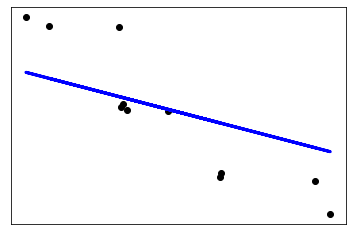

In [32]:
# Make predictions using the testing set
y_pred = LR.predict(x_test.reshape(-1,1))

# The coefficients
print("Coefficients: \n", LR.coef_)
# The intercept
print("Intecept: \n", LR.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [72]:
MinVoltVar = (550-LR.intercept_)/LR.coef_

In [73]:
MinVoltVar

array([0.02524301])

### At ΔQ100-10 = 0.02524301 we get cycle life more than 550 with the data in 2017-05-12 batch